1-EDA

=== Aperçu des 5 premières lignes ===
   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

                                            rephrase  sarcasm  irony  satire  \
0  College is really difficult, expensive, tiring...      0.0    1.0     0.0   
1  I do not like when professors don’t write out ...      1.0    0.0     0.0   
2  I, at the bare minimum, wish companies actuall...      0.0    1.0     0.0   
3  Today my pop-pop told me I was not "forced" to...      1.0    0.0     0.0   
4  I would say Ted Cruz is an asshole and doesn’t...      1.0    0.0     0.0   

   und

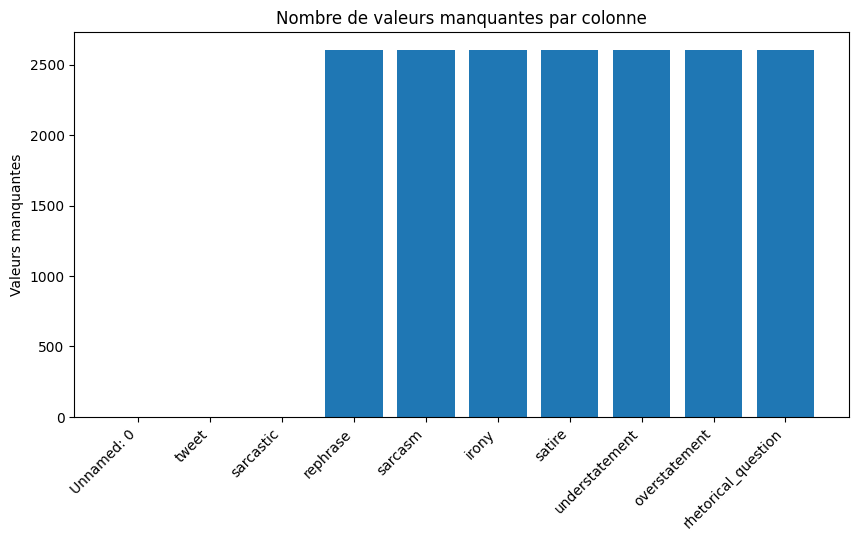

=== Statistiques descriptives ===
         Unnamed: 0                                              tweet  \
count   3468.000000                                               3467   
unique          NaN                                               3456   
top             NaN  @AsdaServiceTeam imagine your delivery being 2...   
freq            NaN                                                  4   
mean    1733.500000                                                NaN   
std     1001.269694                                                NaN   
min        0.000000                                                NaN   
25%      866.750000                                                NaN   
50%     1733.500000                                                NaN   
75%     2600.250000                                                NaN   
max     3467.000000                                                NaN   

          sarcastic rephrase     sarcasm       irony      satire  \
count   3

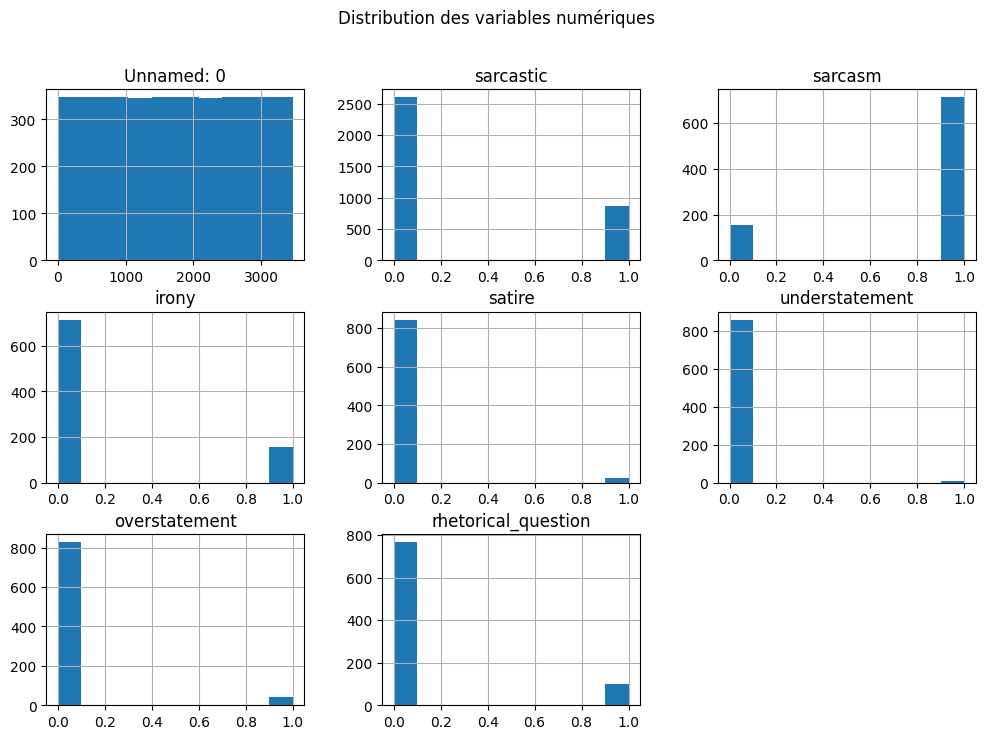

In [26]:
# =============================
# Librairies standard
# =============================
import re
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# Prétraitement du texte
# =============================
from sklearn.feature_extraction.text import TfidfVectorizer

# =============================
# Modèles de classification
# =============================
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # pip install xgboost

# =============================
# Évaluation
# =============================
from sklearn.metrics import accuracy_score, classification_report



# =============================
# 1️⃣ Chargement du dataset
# =============================
train_data = pd.read_csv('train.En.csv')
test_data=pd.read_csv('task_A_En_test.csv')

# =============================
# 2️⃣ Aperçu des données
# =============================
print("=== Aperçu des 5 premières lignes ===")
print(train_data.head(), "\n")

print("=== Dimensions du dataset (lignes, colonnes) ===")
print(train_data.shape, "\n")

print("=== Types de données ===")
print(train_data.dtypes, "\n")

# =============================
# 3️⃣ Informations générales
# =============================
print("=== Informations générales ===")
train_data.info()
print("\n")

# =============================
# 4️⃣ Valeurs manquantes
# =============================
print("=== Valeurs manquantes par colonne ===")
print(train_data.isnull().sum(), "\n")

# Visualisation simple des valeurs manquantes
plt.figure(figsize=(10, 5))
plt.bar(train_data.columns, train_data.isnull().sum())
plt.xticks(rotation=45, ha='right')
plt.title("Nombre de valeurs manquantes par colonne")
plt.ylabel("Valeurs manquantes")
plt.show()

# =============================
# 5️⃣ Statistiques descriptives
# =============================
print("=== Statistiques descriptives ===")
print(train_data.describe(include='all'), "\n")

# =============================
# 6️⃣ Distribution des variables numériques
# =============================
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

if len(num_cols) > 0:
    train_data[num_cols].hist(figsize=(12, 8))
    plt.suptitle("Distribution des variables numériques")
    plt.show()
else:
    print("Aucune variable numérique détectée.\n")






2-Pretraitement et visualisation

In [27]:
train_data=train_data[["tweet","sarcastic"]]

train_data.isnull().sum()/len(train_data) # Vérification après suppression
train_data


,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
...,...,...
3463,The population spike in Chicago in 9 months is...,0
3464,You'd think in the second to last English clas...,0
3465,I’m finally surfacing after a holiday to Scotl...,0
3466,Couldn't be prouder today. Well done to every ...,0


In [28]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)                 # remove mentions
    text = re.sub(r"#", "", text)                    # remove hashtag symbol
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # keep letters and spaces
    text = re.sub(r"\s+", " ", text).strip()         # remove extra spaces
    return text



def clean_data(df):
    df["tweet"]=df["tweet"].apply(str).apply(clean_text)
    return df
train_data=clean_data(train_data)[['tweet','sarcastic']]
train_data
test_data=clean_data(test_data)
test_data



,tweet,sarcastic
0,size on the the toulouse team that pack is mon...,0
1,pinball,0
2,so the scottish government want people to get ...,1
3,villainous pro tip change the device name on h...,0
4,i would date any of these men,0
...,...,...
1395,ive just seen this and felt it deserved a retw...,0
1396,omg how an earth is that a pen,0
1397,bringing kanye and drake to a tl near you,0
1398,i love it when women are referred to as girl b...,1


In [29]:

tweets = train_data['tweet'].tolist()
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(tweets)
y_train = train_data['sarcastic']






In [30]:
tweets_test=test_data['tweet'].tolist()
x_test = tfidf.transform(tweets_test)

In [31]:
def train_model(x_train,y_train,model):
    model.fit(x_train, y_train)
    return model






Training model: LogisticRegression
Testing model: LogisticRegression
Accuracy du modèle LogisticRegression: 0.8586
Training model: LinearSVC
Testing model: LinearSVC
Accuracy du modèle LinearSVC: 0.7950
Training model: MultinomialNB
Testing model: MultinomialNB
Accuracy du modèle MultinomialNB: 0.8571
Training model: RandomForestClassifier
Testing model: RandomForestClassifier
Accuracy du modèle RandomForestClassifier: 0.8479
Training model: KNeighborsClassifier
Testing model: KNeighborsClassifier
Accuracy du modèle KNeighborsClassifier: 0.8571
Training model: DecisionTreeClassifier
Testing model: DecisionTreeClassifier
Accuracy du modèle DecisionTreeClassifier: 0.7086
Training model: AdaBoostClassifier
Testing model: AdaBoostClassifier
Accuracy du modèle AdaBoostClassifier: 0.8571
Training model: GradientBoostingClassifier
Testing model: GradientBoostingClassifier
Accuracy du modèle GradientBoostingClassifier: 0.8557

=== Résumé des performances ===
                       Modèle  Accu

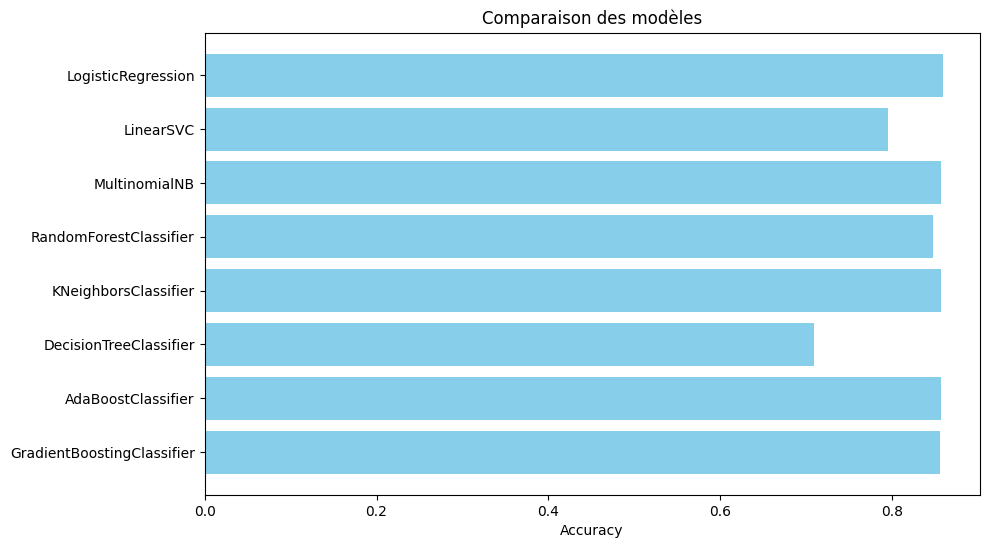

In [32]:
models = [
    LogisticRegression(max_iter=1000),
    LinearSVC(),
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    RidgeClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
]

results = {}

for model in models:
    print("Training model:", model.__class__.__name__)
    trained_model = train_model(x_train, y_train, model)
    
    print("Testing model:", model.__class__.__name__)
    y_pred = trained_model.predict(x_test)
    acc = accuracy_score(test_data['sarcastic'], y_pred)
    
    # Stocker à la fois le modèle entraîné et son accuracy
    results[model.__class__.__name__] = {
        'accuracy': acc,
        'model': trained_model
    }
    
    print(f"Accuracy du modèle {model.__class__.__name__}: {acc:.4f}")

# 🔹 Résumé global
results_df = pd.DataFrame([
    {'Modèle': name, 'Accuracy': value['accuracy']} 
    for name, value in results.items()
])

print("\n=== Résumé des performances ===")
print(results_df.sort_values(by='Accuracy', ascending=False))

# 🔹 Visualisation graphique
plt.figure(figsize=(10,6))
plt.barh(results_df['Modèle'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparaison des modèles')
plt.gca().invert_yaxis()
plt.show()

# 🔹 Exemple de réutilisation sur un autre dataset
# new_data_tfidf = tfidf.transform(new_data['tweet'])
# best_model = results['LogisticRegression']['model']
# predictions = best_model.predict(new_data_tfidf)
